In [1]:
from IPython.display import display, Math, Latex
from matplotlib import cm 
from matplotlib import rc as mplrc
import matplotlib.pyplot as plt
import numpy as np

#### Some parameters

In [2]:
# plotting a prameters
scale_factor = 1.5

labels = 16 * scale_factor
ticks = 10 * scale_factor
# ticks = 10 * scale_factor
legends = 12 * scale_factor
text = 14 * scale_factor
titles = 22 * scale_factor
lw = 3 * scale_factor
ps = 200 * scale_factor
cmap = 'magma'

colors = ['firebrick', 'steelblue', 'darkorange', 'darkviolet', 'cyan', 'magenta', 'darkgreen', 'deeppink']
markers = ['x', 'o', '+', '>', '*', 'D', '4']
linestyles = ['-', '--', ':', '-.']

# What is a neural network?

Just a series of matrix multiplications (and vector additions) followed by nonlinear functions. You need nonlinear functions because a series of matrix multiplications is simply a multiplication by a single matrix. Each layer (linear operation) has a matrix with weights and a vector with biases (sometimes not used).

Mathematically, we can express a neural network, $g(\vec{x})$, containing $L$ layers, each with an activation function $f_{L}$ and a weight matrix $X_{L}$, as $$g(\vec{x}) = f_{L}(W_{L}f_{L-1}(W_{L-1}......f_{1}(W_{1}\vec{x})...)) $$

The simplest type is called a "feedforward multilayer perceptron."$^{*}$ The input is a vector that is sent through a series of dense matrices and nonlinear functions.

<img src="imgs/mlp.png" style="height:600px" class="center" alt="mlp"/><br>

$^{*}$ technically a misnomer, but it's what everyone says.

By the Universal Approximation Theorem, _any_ bounded function in $\mathbb{R}^{n}$ can be approximated to arbitrary precision by a neural network (not that you can always realistically achieve this). This makes them one of the most powerful tools in machine learning, which is a big reason why they are so ubiquitous.

Neural networks were first designed in the 1950s, but there were no computers remotely capable of implementing them for decades. The increase in computational power along with the introduction of the idea of backpropogation for optimization made them feasible and powerful.

Backpropogation is a method of efficiently calculating the derivative of the cost function with respect to a weight matrix. It does so by recognizing that each layer only affects the performance of the network as a whole to the extent that it affects the input to the next layer. By recusrively calculating the effect of a given weight matrix only on the next layer, the total derivative of the cost function can be quickly found with the chain rule. Defining $C$ as the cost function, $x$ as the vector input for the network, $z_{L}$ as the input to the activation at layer $L$, and $a_{L}$ as the output of the activation at layer $L$:

$$\frac{dC}{dx} = \frac{dC}{da_{L}} \cdot \frac{da_{L}}{dz_{L}} \cdot \frac{dz_{L}}{da_{L-1}} \cdot \frac{da_{L-1}}{dz_{L-1}} ... \frac{da_{1}}{dz_{1}} \frac{dz_{1}}{dx} $$

$\frac{dC}{da_{L}}$ is simple to calculate using the output of the entire network. $\frac{da_{L}}{dz_{L}}$ is just the derivative of the activation function at that value (diagonal matrix). $\frac{dz_{L}}{da_{L-1}}$ is simply the weight matrix, $W_{L}$, itself. Using this, we can efficiently optimize the enormous number of parameters in neural networks.

The breadth of architectures is enormous, so there's no way we can be both exhaustive and detailed. For now, we'll focus on two main types: MLPs and CNNs. These are both feedfoward networks as opposed to recurrent networks, which we'll get into later. We'll first take a quick detour to talk about activations.

## Activations

### Functions

In [3]:
def get_relu(x: float) -> float:
    
    return max([0., x])
def get_elu(x: float, alpha: float=1.) -> float:
    
    return x if x >= 0 else alpha * (np.exp(x) - 1.)

def get_silu(x: float) -> float:
    
    return x  / (1 + np.exp(-x))

def get_gelu(x: float) -> float:
    
    return 0.5 * x * (1 + np.tanh(np.sqrt(2./np.pi) * (x + 0.044715 * x ** 3)))

def get_sigmoid(x: float) -> float:
    
    return 1. / (1. + np.exp(-x))

def get_softmax(x: float, xs: list) -> float:
    
    return np.exp(x) / np.sum(np.exp(xs))

def plot_image(image: list, category: str='', cmap: str='viridis', show_ticks: bool=True):
    
    '''Plots an image'''
    
    plt.figure(figsize=(8.5, 8.))
    
    plt.imshow(image, cmap=cmap)
    
    if show_ticks:
        plt.xticks(fontsize=ticks)
        plt.yticks(fontsize=ticks)
    else:
        plt.xticks([])
        plt.yticks([])
        
    if category != '':
        plt.title(category, fontsize=titles)
        
    plt.show()
    
def plot_image_panel(images: list, labels: list=[], cmap: str='viridis', show_ticks: bool=True):
    
    '''Plots a 2x2 panel of images'''
    
    mplrc('xtick', labelsize=ticks) 
    mplrc('ytick', labelsize=ticks)
    mplrc('axes', titlesize=titles)
    
    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12., 12.))
    
    for (i, image) in enumerate(images):
        if i > 1:
            ax = axs[1, i % 2]
        else:
            ax = axs[0, i]
        
        ax.imshow(image, cmap=cmap)
        if len(labels) > i and labels[i] != '':
            ax.set_title(labels[i])
        if i % 2 == 1:
            ax.set_yticks([])
            ax.set_yticks([])
    
        if not show_ticks:
            ax.set_xticks([])
            ax.set_yticks([])
        
    plt.show()

def plot_curves(curves: list, plot_labels: list=[], cmap: str='viridis', show_ticks: bool=True, 
                xlabel: str='x', ylabel: str='y', xscale: str='', yscale: str=''):
    
    '''Plots multiple curves on the same plot'''
    
    mplrc('xtick', labelsize=ticks) 
    mplrc('ytick', labelsize=ticks)
    mplrc('axes', titlesize=titles)
    
    if len(curves) > len(colors):
        these_colors = cm.get_cmap('viridis', len(curves)).colors
    else:
        these_colors = colors
    
    fig = plt.figure(figsize=(8., 6.))
    
    for (i, curve) in enumerate(curves):
        
        plt.plot(curve[0], curve[1], lw=lw, c=colors[i], label=plot_labels[i])
        
    plt.legend(loc='best', fontsize=legends)
    plt.xlabel(xlabel, fontsize=labels)
    plt.ylabel(ylabel, fontsize=labels)
    plt.xticks(fontsize=ticks)
    plt.yticks(fontsize=ticks)
    
    if xscale == 'log':
        plt.xscale('log')
    if yscale == 'log':
        plt.yscale('log')

    plt.show()
    

def plot_activations(objective: str='regression', alpha: float=1.):

    
    xs = np.linspace(-4, 4, 100)
    
    if objective == 'regression':
        
        relu_ = np.array([get_relu(x) for x in xs])
        elu_ = np.array([get_elu(x, alpha=alpha) for x in xs])
        silu_ = np.array([get_silu(x) for x in xs])
        gelu_ = np.array([get_gelu(x) for x in xs])
        
        curves = [[xs, relu_], [xs, elu_], [xs, silu_], [xs, gelu_]]
        plot_labels = ['ReLU', 'ELU', 'SiLU', 'GELU']
        
    else:
        sigmoid_ = np.array([get_sigmoid(x) for x in xs])
        tanh_ = np.array([np.tanh(x) for x in xs])
        curves = [[xs, sigmoid_], [xs, tanh_]]
        plot_labels = ['Sigmoid', 'tanh']
        
    
    plot_curves(curves, plot_labels)

### Text

It is essential that nonlinear operations are performed within the network. Since a neural network is just glorified matrix multiplication, applying no nonlinear functions is the same as multiplying ny a single matrix. This is where activations come in. 

Activations are nonlinear functions that are applied between neural network layers. There are different activations for different layers. Non-output layers typically use something like ReLU (rectified linear unit) whereas output layers can use something like softmax.

Typical activations inside network:

* ReLU

$$ ReLU(x_{i}) = max([0, x_{i}]) $$

ReLU suffers from the "vanishing gradient problem" because there is a non-differentiable cusp at 0 and the derivative of all negative values is zero.

Various other activations introduce ideas to help solve this.

* ELU (exponential linear unit)

$$ ELU(x_{i}) = \left\{ 
    \begin{array}{ll}
    x & x \geq 0 \\
    \alpha(e^{x_{i}} - 1) & x < 0\\
\end{array} 
\right.  $$

* SiLU (Sigmoid linear unit)

$$ SiLU(x_{i}) = \frac{x_{i}}{1 + e^{-x_{i}}}$$

* GELU (Gaussian error linear unit)

$$ GELU(x_{i}) = x_{i}P(X\leq x_{i}) = x_{i}\Phi(x_{i})$$ 
$$ $$
$$ \qquad \approx 0.5x_{i}\left(1 + tanh\left[ \sqrt{2/\pi}(x_{i} + 0.044715x_{i}^{3})\right]\right) $$

&emsp; &emsp; where $X \sim \mathcal{N[0, 1]}$ and $\Phi$ is the Gaussian CDF.

These are just a subselection, but the idea of all of them is to allo wthere to be nonzero derivatives at all points and make all points differentiable.


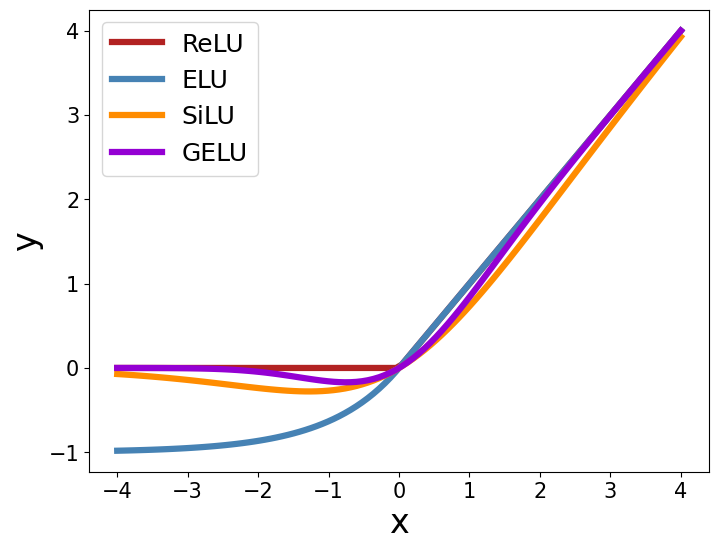

In [4]:
plot_activations(objective='regression')

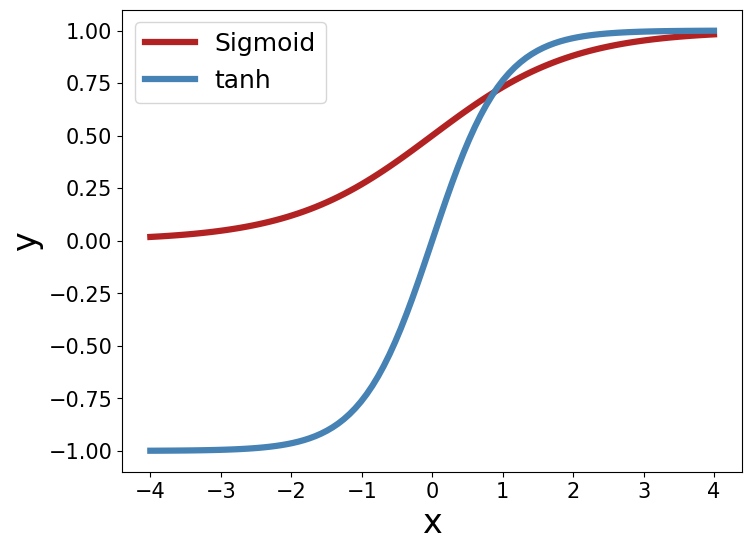

In [5]:
plot_activations(objective='classification')

# MLP

As stated above, the MLP is a trivial example of a neural network, but we still can't understate its power. An MLP satisfies the universal approximation theorem, so it can theoretically solve almost any problem. Despite this, the specifics of the architecture, hyperparameters, optimizers, data quality, etc. can make this extremely difficult.

Regardless, they are useful. Data is often in the form of vectors. Tabular data, for example, is extremely common and used in databases such as SQL. This is the type of data that we saw last week with the iris dataset: each entry had four numerical features that described that datapoint. We used simple algorithms because the problem was so simple, but we could have certainly used an MLP. Typically, the problems and data are much more complex than the iris dataset, so MLPs naturally emerge as top algorithms. 

Let's do a simple classification with an MLP made with PyTorch Lightning. This will use the classic MNIST fashion dataset.

## Imports

In [6]:
import random

import pandas as pd
import PIL

import pytorch_lightning as pl
from pytorch_lightning.callbacks import LearningRateMonitor, ModelCheckpoint, progress
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
from pytorch_lightning.loggers import WandbLogger, TensorBoardLogger

from sklearn.model_selection import train_test_split

import torch
from torch import nn, Tensor
import torch.nn.functional as F
import torch.optim as optim
from torch.optim.lr_scheduler import MultiStepLR
from torch.utils.data import DataLoader, Dataset, RandomSampler, random_split

import torchmetrics

import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as T

In [7]:
### Set seed for reproducibility
np.random.seed(123)
random.seed(123)
torch.manual_seed(123)

## Download data

In [8]:
### Download fashion MNIST
train_dataset = datasets.FashionMNIST(
    root='./data', train=True, download=True,)
test_dataset = datasets.FashionMNIST(
    root='./data', train=False, download=True,)

In [9]:
### Get possible classes in data
classes = train_dataset.classes

## Prepare data

In [10]:
### This is just for practice, the returned data is actually already in the proper format

## turn data from torch tensor into numpy array
## detach() takes it away from the device
## tensors are default formatted for the training device and need to be detached
## before they can be manipulated like real data
X_train = train_dataset.data.detach().numpy()
y_train = train_dataset.targets.detach().numpy()

X_test = test_dataset.data.detach().numpy()
y_test = test_dataset.targets.detach().numpy()

In [11]:
### PyTorch uses Dataset objects to load the data during training and testing
class MNISTDataset(Dataset):

    """Data set"""

    def __init__(
        self,
        X, y, transforms: list=None, is_train: bool=False
    ):
        '''Assign data'''
        self.X, self.y = X, y
        self.transforms = transforms
        self.is_train = is_train
        
    def __len__(self):
        '''function to get the length of the dataset'''
        return len(self.X)

    def __getitem__(self, idx: int):
        '''return an x, y pair'''
        x_, y_ = self.X[idx], self.y[idx]
        
        return torch.from_numpy(x_).float(), y_


In [12]:
# split into validation and training data
val_split = 0.2
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                                                     test_size=val_split,
                                                     random_state=123)

In [13]:
# add channel axes (N, H, W) -> (N, C, H, W) because C = 1 in this case
X_train = X_train[:, np.newaxis, :, :]
X_test = X_test[:, np.newaxis, :, :]
X_val = X_val[:, np.newaxis, :, :]

In [14]:
# get H = W
input_xy = X_train.shape[-1]

In [15]:
batch_size = 64

In [16]:
##### Now we actually make the dataset and dataloader in PyTorch fashion
train_data = MNISTDataset(X_train, y_train, is_train=True,)
val_data = MNISTDataset(X_val, y_val)
test_data = MNISTDataset(X_test, y_test)

# make the loader
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
val_loader = DataLoader(val_data, batch_size=batch_size)
test_loader = DataLoader(test_data)

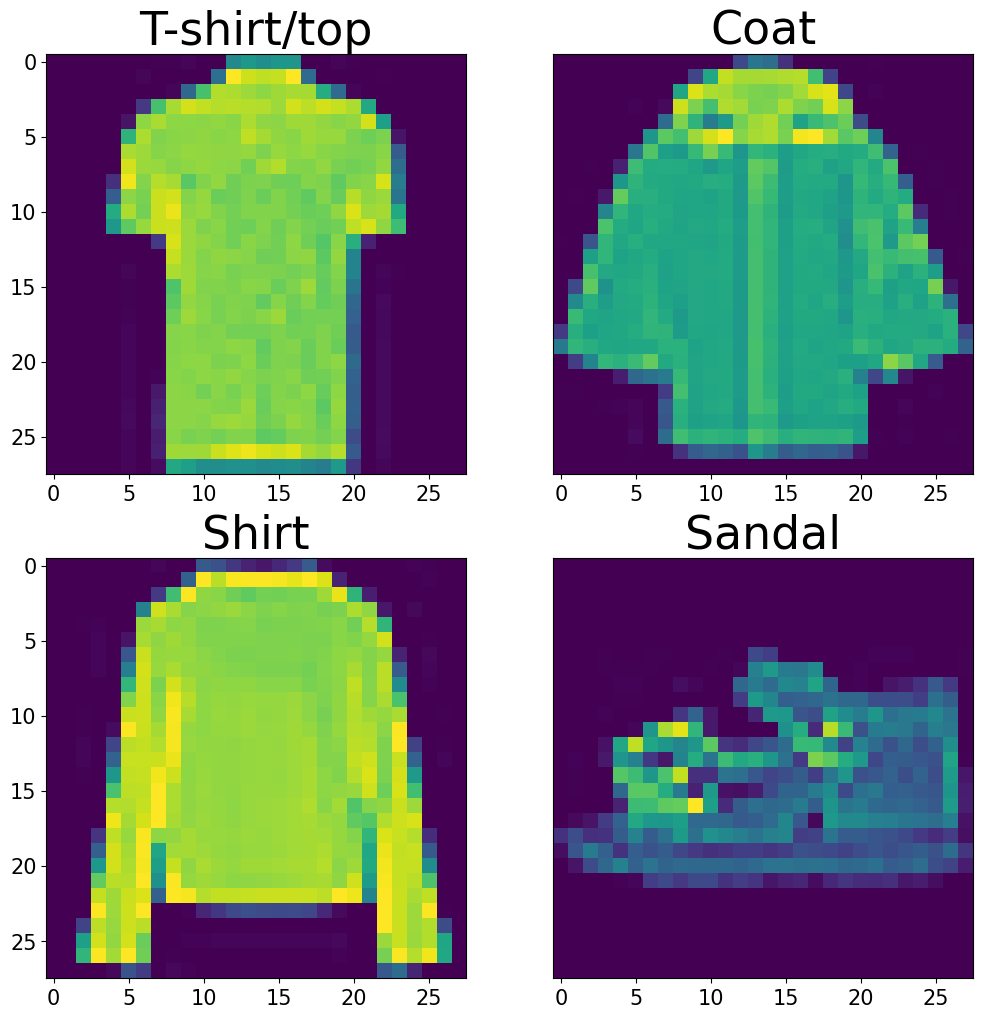

In [17]:
## plot some data
plot_classes = [classes[y_train[i]] for i in range(4)]
plot_image_panel(X_train[:4, 0], labels=plot_classes)

## Set up model

In [18]:
num_epochs = 25

In [19]:
accelerator_name = "mps" ### for MacBooks, "cuda" is for cuda, which is more common
accelerator_name = "cpu" ## (sometimes GPUs don't work with Jupyter)

In [20]:
# boilerplate to get GPU if possible
if accelerator_name == "mps":
    device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
elif accelerator_name == "cuda":
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
else:
    device = torch.device("cpu")

# Ensure that all operations are deterministic on GPU (if used) for reproducibility
torch.backends.cudnn.determinstic = True
torch.backends.cudnn.benchmark = False

### Models in PyTorch (+Lightning) are Python classes that we have to define

Models in PyTorch are all objects (classes) of the superclass torch.nn.Module. To make a model, you must define an object with specific attributes and functions that define the model architecture, the training process, etc. PyTorch Lightning takes care of some of the annoying boilerplate overhead of normal PyTorch, so we'll use that. PyTorch Lightning models are of the superclass pl.LightningModule. 

In order to make a model in PTL, we'll need to do a few things to the class:

1. define an object as a subclass of pl.LightningModule
2. define the \_\_init\_\_ function accept arguments that define the model architecture, optmizer, etc. (make sure you always initialize the superclass first)
3. make a forward() method that defines how an input goes through the network
4. make training_step(), validation_step(), and test_step() methods according to how you want the model to perform during training and inference
5. set up your optimizer using configure_optimzers()
6. Depending on the specifics, you may need to add methods such as on_epoch_end(), on_train_epoch_end(), lr_scheduler_step(), etc.
7. Add anything else you want your model to do

The power and flexibility of PyTorch (Lightning) come from the fact that it treats models as python objects. TensorFlow takes the approach of creating static graphs, which has benefits (e.g. ease of loading), but it can be difficult to make extremely complicated networks and the networks themselves are ultimately just graphs. On the other hand, as an object, PyTorch networks can be made complex very easily. Python is, after all, an object-oriented language. The language itself is geared towards the development and use of objects, so PyTorch naturally integrates itself into Python and is able to exploit the inherent abilities of the language to an extent that the more mathematical concepts behind TensorFlow cannot.

In [21]:
class SimpleMLP(pl.LightningModule):

    def __init__(self, 
                 num_layers: int = 6,
                 dropout: float = 0.25,
                 mlp_layer_dim: int = 64,
                 n_classes: int = 10, 
                 input_xy: int = 28, 
                 lr: float = 1e-4, 
                 weight_decay: float = 0., 
                 eps: float = 5e-7, 
                 activation: str = "gelu",
                 use_wandb: bool=False,
                 scheduler_name: str = "none",
                 step_size: int = 5,
                 gamma: float = 0.5,
                 ) -> None:
        super().__init__()
        ### Always need to call above function first in order
        ### to properly initialize a model
        '''Basic MLP to classify fashion MNIST'''
        
        # model parameters
        self.mlp_dim = mlp_layer_dim
        self.activation = activation
        self.dropout = dropout
        self.num_layers = num_layers
        self.input_dim = int(input_xy ** 2)

        ## optimizer information
        self.lr = lr
        self.eps = eps
        self.weight_decay = weight_decay
        self.scheduler_name = scheduler_name
        # if using a scheduler
        self.step_size = step_size
        self.gamma = gamma

        # define a softmax function to use later during inference
        self.softmax = nn.Softmax(dim=1)
                     
        # log using WandB or TensorBoard
        self.use_wandb = use_wandb
        
        # functions that keep track of accuracy during validation and testing
        self.val_accuracy = torchmetrics.Accuracy(task="multiclass", num_classes=n_classes)
        self.test_accuracy = torchmetrics.Accuracy(task="multiclass", num_classes=n_classes)

        # what the input data looks like (allows construction of graph for logging)
        # (batch_size, channels, height, width)
        self.example_input_array = torch.zeros(
            (1, self.input_dim),
            dtype=torch.float32
        )
        
        #### Construct the layers #####
        ## get input layer
        ## shape = (C, H, W) -> (H * W because of flattening)
        self.input_layer =  nn.Linear(self.input_dim, self.mlp_dim)
        
        ## make MLP hidden layers
        self.mlp_layers = [nn.GELU() if self.activation == "gelu" else nn.ReLU()]
        for i in range(num_layers):
            self.mlp_layers.append(nn.Linear(self.mlp_dim, self.mlp_dim))
            ## add activation and dropout for hidden layers
            if self.activation == "gelu":
                self.mlp_layers.append(nn.GELU())
            ## relu as default
            else:
                self.mlp_layers.append(nn.ReLU())
            self.mlp_layers.append(nn.Dropout(dropout))

        ## turn into module
        self.layers = nn.ModuleList(self.mlp_layers)
        
        # final output layer
        self.output = nn.Linear(mlp_layer_dim, n_classes)

        ### initialize weights of layers
        self.init_weights()

    def forward(self, x):
        '''Determines how data is passed through the network, 
           i.e creates the connectivity of the network'''
        
        ## send through input layer
        x = self.input_layer(x)
        ## pass through hidden layers
        for layer in self.layers:
            x = layer(x)
        # return output
        x = self.output(x)

        return x

    def init_weights(self) -> None:
        ### does some fancy layer weight initialization
        for layer in self.layers:
            if isinstance(layer, nn.Linear):
                nn.init.xavier_uniform_(layer.weight)

    def process_batch(self, batch, step: str = "train"):
        """Passes and logs a batch for a given type of step (test, train, validation)"""
        
        # get data
        x, y = batch

        ### need to flatten the input data in order to pass it through (it's an image at first)
        x = x.view((x.size()[0], x.size()[-1] ** 2))
        
        # pass through network
        # logits have no activation applied
        logits = self(x)
        
        ## get loss
        ## F.cross_entropy applies softmax then gets cross entropy,
        ## so we don't need to activate the network output
        loss = F.cross_entropy(logits, y) 
        
        # record the loss
        self.log(f"{step}_loss", loss)
        if step in ["val", "test"]:
            scores = self.softmax(logits)
            # predicted class is the one with the maximum output probability
            preds = torch.argmax(scores, dim=1)
            # get accuracy
            if step == "val":
                self.val_accuracy.update(preds, y)
                # bring it off of the GPU in order to do calculations
                acc = float(self.val_accuracy(preds, y).detach().cpu().numpy().item())
            else:
                self.test_accuracy.update(preds, y)
                acc = float(self.test_accuracy(preds, y).detach().cpu().numpy().item())
            self.log(f"{step}_acc", acc) 
        
        # upload the loss to WandB
        if self.use_wandb:
            log_dict = {f"{step}_loss": loss,}
            if step in ["val", "test"]:
                log_dict[f"{step}_accuracy"] = acc
            wandb.log(log_dict)
                    
        return loss
    
    def training_step(self, batch, batch_idx):
        """What do do with a training batch"""
        return self.process_batch(batch, step="train")

    def validation_step(self, batch, batch_idx):
        '''Validation step (at the end of each epoch)'''
        return self.process_batch(batch, step="val")
        
    def test_step(self, batch, batch_idx):
        '''Test step is essentially the same as a validation step in this instance'''
        return self.process_batch(batch, step="test")

    def configure_optimizers(self) -> (list, list):
        """Set up the optimizer and potential learning rate scheduler"""
        self.optimizer = torch.optim.AdamW(
            self.parameters(),
            lr=self.lr,
            eps=self.eps,
            weight_decay=self.weight_decay,
        )

        if self.scheduler_name == "none":
            return self.optimizer

        ### this decreases the learning rate by a factor of gamma every step_size
        self.scheduler = MultiStepLR(
            self.optimizer,
            list(range(0, self.trainer.max_epochs, self.step_size)),
            gamma=self.gamma,
        )

        return [self.optimizer], [{"scheduler": self.scheduler, "interval": "epoch"}]
        
    #### need to add these two things in case the scheduler is used ####
    def lr_scheduler_step(self, scheduler, metric) -> None:
        if self.scheduler_name != "none":
            self.scheduler.step()

    def on_epoch_end(self) -> None:
        if self.scheduler_name != "none":
            self.scheduler.step()


### Choose model hyperparameters

In [22]:
# model hyper parameters 
lr = 1e-4
eps = 5e-7
weight_decay = 1e-8
num_layers = 6
dropout = 0.25
mlp_layer_dim = 128
n_classes = 10
activation = "gelu"
input_xy = X_train.shape[-1]
scheduler_name = "step"
gamma = 0.5
step_size = 5

## WandB stuff
## we aren't going to use wandb because it requires an account, but you should see how to use it
# log with WandB or TensorBoard
use_wandb = False
# WandB project name
project_name = "SimpleMNIST_MLP"
# WandB lab name
entity = ""

In [23]:
mlp_hparams = {'lr': lr,
                'eps': eps,
                'weight_decay': weight_decay,
                'num_layers': num_layers,
                'dropout': dropout,
                'input_xy': input_xy,
                'use_wandb': False,
                'activation': activation,
                'mlp_layer_dim': mlp_layer_dim,
                'n_classes': n_classes,
                'scheduler_name': scheduler_name,
                'gamma': gamma,
                'step_size': step_size,
}

In [24]:
mlp_model = SimpleMLP(
                      num_layers=num_layers, 
                      mlp_layer_dim=mlp_layer_dim,
                      n_classes=n_classes, 
                      input_xy=input_xy, 
                      activation=activation,
                      use_wandb=use_wandb,
                      dropout=dropout, 
                      eps=eps, 
                      lr=lr, 
                      weight_decay=weight_decay,
                      scheduler_name=scheduler_name,
                      gamma=gamma,
                      step_size=step_size,
                )


## Train

In [25]:
if not use_wandb:
    %load_ext tensorboard
    mlp_logger = TensorBoardLogger("mlp_logs", name="simple_mnist_fashion_mlp")
    run_name = "MLP"
else:
    logger_kwargs = {
        "resume": "allow",
        "config": model_hparams,
    }
    mlp_logger = WandbLogger(project=project_name, entity=entity, **logger_kwargs)
    run_name = logger.experiment.name

In [26]:
#### necessary for newer PTL versions
devices = 1
accelerator = "gpu" if devices == 1 else "cpu"

# make the trainer
mlp_trainer = pl.Trainer(
    devices=devices,
    accelerator=accelerator,
    max_epochs=num_epochs,
    log_every_n_steps=1,
    logger=mlp_logger,
    ## callbacks are done at the end of each epoch
    callbacks=[
        # saves the model at the end of the epoch if it has the best validation accuracy
        ### we aren't actually going to do this in order to avoid saving models
        # ModelCheckpoint(
        #     save_weights_only=False,
        #     mode="min",
        #     monitor="val_acc",
        #     save_top_k=1,
        #     every_n_epochs=1,
        #     save_on_train_epoch_end=False,
        #     dirpath=f"/MLP_Checkpoints/{run_name}/",
        #     filename=f"mlp_checkpoint_{run_name}",
        # ),
        # log the learning rate during training
        LearningRateMonitor("epoch"),
        # progress bar during training
        progress.TQDMProgressBar(refresh_rate=1),
        # stops if the validation accuracy doesn't improve in 10 epochs
        EarlyStopping(
            monitor="val_acc",
            min_delta=0,
            patience=10,
            verbose=False,
            mode="min",
        ),
    ],
)
mlp_trainer.logger._log_graph = True
mlp_trainer.logger._default_hp_metric = None

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [27]:
mlp_trainer.fit(mlp_model, train_dataloaders=train_loader, val_dataloaders=val_loader)


  | Name          | Type               | Params | In sizes | Out sizes
----------------------------------------------------------------------------
0 | softmax       | Softmax            | 0      | ?        | ?        
1 | val_accuracy  | MulticlassAccuracy | 0      | ?        | ?        
2 | test_accuracy | MulticlassAccuracy | 0      | ?        | ?        
3 | input_layer   | Linear             | 100 K  | [1, 784] | [1, 128] 
4 | layers        | ModuleList         | 99.1 K | ?        | ?        
5 | output        | Linear             | 1.3 K  | [1, 128] | [1, 10]  
----------------------------------------------------------------------------
200 K     Trainable params
0         Non-trainable params
200 K     Total params
0.803     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

/Users/jasonterry/miniforge3/envs/pytorch_python10/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:432: PossibleUserWarning: The dataloader, val_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 10 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/Users/jasonterry/miniforge3/envs/pytorch_python10/lib/python3.10/site-packages/torch/functional.py:799: UserWarning: MPS: _unique2 op is supported natively starting from macOS 13.0. Falling back on CPU. This may have performace implications. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/mps/operations/Unique.mm:354.)
  output, inverse_indices, counts = torch._unique2(
/Users/jasonterry/miniforge3/envs/pytorch_python10/lib/python3.10/site-packages/torchmetrics/functional/classification/accuracy.py:65: UserWarning: MPS: no s

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

## Test

In [28]:
test_results = mlp_trainer.test(mlp_model, test_loader)
print(test_results)

/Users/jasonterry/miniforge3/envs/pytorch_python10/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:432: PossibleUserWarning: The dataloader, test_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 10 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.8163000345230103
        test_loss           0.5057256817817688
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
[{'test_loss': 0.5057256817817688, 'test_acc': 0.8163000345230103}]


In [29]:
## open up TensorBoard to see metrics
if not use_wandb:
    %tensorboard --logdir mlp_logs --port 6006

## Exercise

Use the classic [Higgs dataset](https://archive.ics.uci.edu/dataset/280/higgs) (~GB) to train a binary classifier that determines if a Higgs Boson is present in the LHC event. Play around with using only a subset of the features for each data point. 